In [1]:
using OTSIN
using Plots
using StatsPlots
using LinearAlgebra

┌ Info: Precompiling OTSIN [7b885788-be81-11e9-3333-a562fe72c8d6]
└ @ Base loading.jl:1192
┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1192
┌ Info: Precompiling StatsPlots [f3b207a7-027a-5e70-b257-86293d7955fd]
└ @ Base loading.jl:1192


In [2]:
# ML_PL_007 web of life
Y = [
469 110 35 36 11 12 8 8 14 8 3 2 7 0 0 0 0 0 0 2 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0;
36 31 0 0 20 3 0 5 0 5 9 10 2 5 2 0 0 4 2 1 0 3 1 2 2 0 0 0 0 0 0 0 0 1 1 1;
8 0 3 0 0 8 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0;
2 1 1 0 0 0 0 0 0 0 0 1 0 2 0 0 4 0 1 0 0 0 2 0 0 1 0 1 0 1 0 0 0 0 0 0;
2 6 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0;
2 0 0 0 0 0 4 0 0 0 1 0 2 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0;
0 0 0 0 0 0 6 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0;
4 0 0 0 0 0 2 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0;
1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 5 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0;
3 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0;
0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0;
0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0;
0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0;
0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0;
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0;
1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

16×36 Array{Int64,2}:
 469  110  35  36  11  12  8  8  14  8  …  0  0  1  0  0  0  0  0  0  0  0  0
  36   31   0   0  20   3  0  5   0  5     2  0  0  0  0  0  0  0  0  1  1  1
   8    0   3   0   0   8  0  4   0  0     0  0  0  0  0  0  0  0  0  0  0  0
   2    1   1   0   0   0  0  0   0  0     0  1  0  1  0  1  0  0  0  0  0  0
   2    6   0   1   1   0  0  0   0  0     0  0  0  0  0  0  0  0  0  0  0  0
   2    0   0   0   0   0  4  0   0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
   0    0   0   0   0   0  6  0   0  0     0  0  0  0  0  0  0  0  0  0  0  0
   4    0   0   0   0   0  2  0   0  0     0  0  0  0  0  0  1  0  0  0  0  0
   1    0   0   0   0   0  0  0   0  1     0  0  0  0  1  0  0  0  0  0  0  0
   3    0   2   0   0   0  0  0   0  0     0  0  0  0  0  0  0  0  0  0  0  0
   0    0   4   0   0   0  0  0   0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
   0    0   1   0   0   0  1  0   0  0     0  0  0  0  0  0  0  0  0  0  0  0
   0    0   0   0   0   0  0  0   0  0    

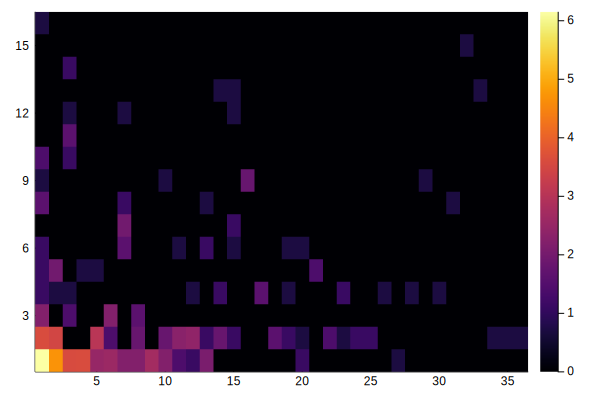

In [3]:
heatmap(log.(Y.+1))

In [4]:
P = OTSIN.normalize(Y)
a, b = marginals(P)
n, m = size(Y)

(16, 36)

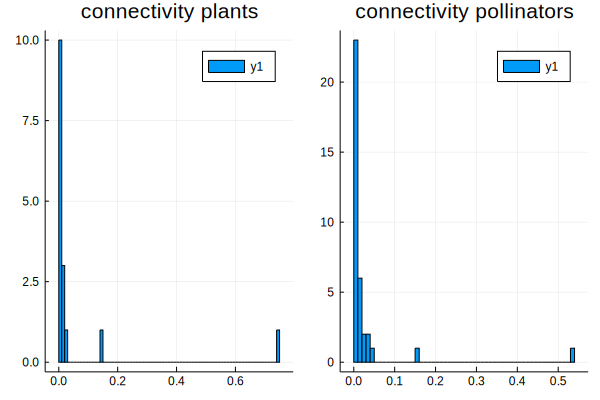

In [5]:
plot(histogram(a, title="connectivity plants"), histogram(b, title="connectivity pollinators"))

In [64]:
γ = 1e-3
offset = 0.1

M_free = fitM(P, fix_a=false, fix_b=false, γ=γ, reg=L2())
M_a = fitM(P, fix_a=true, fix_b=false, γ=γ, reg=L2())
M_b = fitM(P, fix_a=false, fix_b=true, γ=γ, reg=L2())
M_ab = fitM(P, fix_a=true, fix_b=true, γ=γ, reg=L2())

16×36 Array{Float64,2}:
 4.07163   4.14854   3.1493    4.70557   …  0.888273  0.888273  0.888273
 1.36386   2.73499   0.497365  0.746429     1.42838   1.42838   1.42838 
 2.32898   0.854511  2.85889   0.964        0.987161  0.987161  0.987161
 0.701288  1.04709   1.10413   0.930908     0.97404   0.97404   0.97404 
 1.05147   3.60619   0.876523  2.37298      0.987928  0.987928  0.987928
 0.856163  0.815823  0.834634  0.950928  …  0.982131  0.982131  0.982131
 0.835455  0.951509  0.958     0.99009      0.996612  0.996612  0.996612
 1.71777   0.870157  0.884907  0.968831     0.98897   0.98897   0.98897 
 0.982721  0.908268  0.919512  0.979566     0.992893  0.992893  0.992893
 2.05039   0.926101  3.15537   0.98411      0.994515  0.994515  0.994515
 0.908215  0.976335  5.39175   0.9954    …  0.998441  0.998441  0.998441
 0.762758  0.920596  1.79744   0.982739     0.994028  0.994028  0.994028
 0.772249  0.925001  0.93451   0.983839     0.994418  0.994418  0.994418
 0.902277  0.974523  4.3853

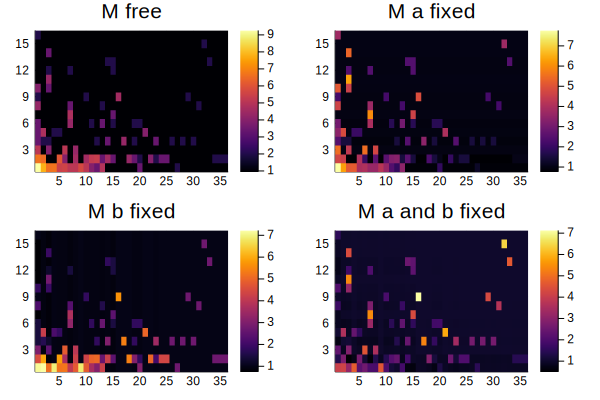

In [65]:
p_free = heatmap(M_free, title="M free")
p_a = heatmap(M_a, title="M a fixed")
p_b = heatmap(M_b, title="M b fixed")
p_ab = heatmap(M_ab, title="M a and b fixed")

plot(p_free, p_a, p_b, p_ab, layout=(2, 2))

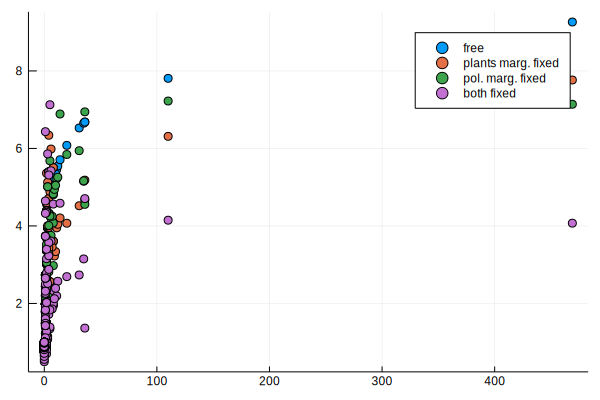

In [93]:
scatter(vec(Y) .|> log, vec((M_free)), label="free")
scatter!(vec(Y) .|> log, vec((M_a)), label="plants marg. fixed")
scatter!(vec(Y) .|> log, vec((M_b)), label="pol. marg. fixed")
scatter!(vec(Y) .|> log, vec((M_ab)), label="both fixed")

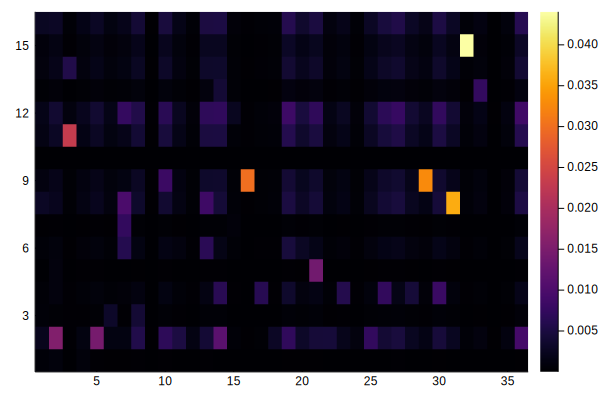

In [67]:
Q = optimaltransport(M_ab, rand(n) |> OTSIN.normalize, rand(m) |> OTSIN.normalize)
heatmap(Q)

In [68]:
using Zygote

In [69]:
function OTSIN.utility(M, a, b)
    P = optimaltransport(M, a, b)
    return utility(P, M)
end

function OTSIN.entropy(M, a, b)
    P = optimaltransport(M, a, b)
    return entropy(P)
end

project_unit(Δx) = Δx .- sum(Δx) / length(Δx) * ones(length(Δx))

project_unit (generic function with 1 method)

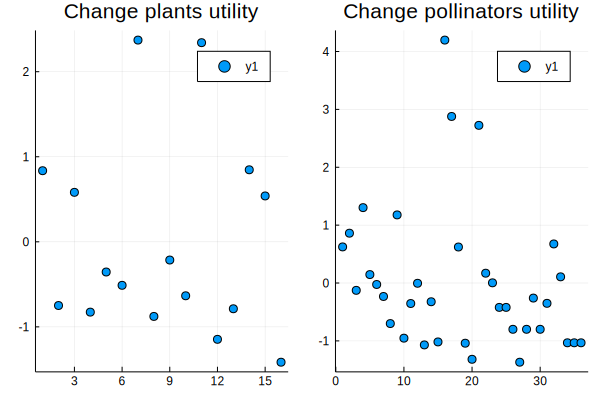

In [70]:
∇M_ab, ∇a, ∇b = gradient(utility, M_ab, a, b)
plot(scatter(project_unit(∇a), title="Change plants utility"),
    scatter(project_unit(∇b), title="Change pollinators utility"))

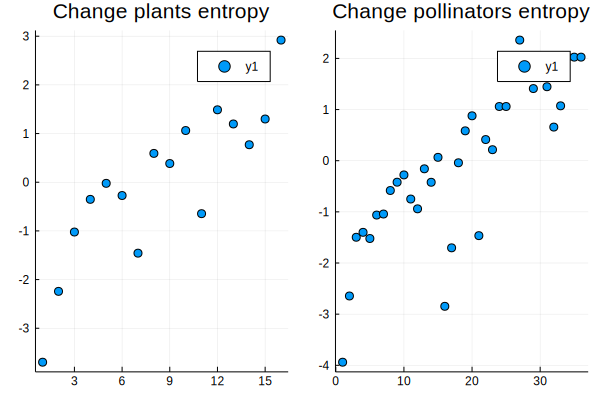

In [71]:
∇M_ab, ∇a, ∇b = gradient(entropy, M_ab, a, b)
plot(scatter(project_unit(∇a), title="Change plants entropy"), scatter(project_unit(∇b), title="Change pollinators entropy"))

In [72]:
function optimaltransport_safe(M::AbstractMatrix, a::AbstractVector, b::AbstractVector;
                        λ::Real=1.0, maxitter::Int=10, ϵ::Real=1e-5)
    Q = exp.(λ * M)
    iter = 0
    while iter < maxitter && maximum(abs.(sum(Q, dims=2)[:] - a)) > ϵ
        iter += 1
        Q = a .* (sum(Q, dims=2) .\ Q)
        Q = Q .* transpose(b) ./ sum(Q, dims=1)
    end
    return Q
end
    
optimaltransport_safe(M_ab, marginals(P)...) 

16×36 Array{Float64,2}:
 0.477901     0.111566     0.0349884    …  0.000266833  0.000266833
 0.0362739    0.0308928    0.00280819      0.000521229  0.000521229
 0.00743671   0.000367974  0.00232628      2.61849e-5   2.61849e-5 
 0.00305174   0.000932223  0.000840718     5.40032e-5   5.40032e-5 
 0.00194516   0.00541068   0.000300696     2.45911e-5   2.45911e-5 
 0.00240295   0.000498904  0.000433055  …  3.67171e-5   3.67171e-5 
 0.00043022   0.000104444  8.95487e-5      6.80922e-6   6.80922e-6 
 0.00345114   0.000319625  0.000276314     2.24319e-5   2.24319e-5 
 0.00104631   0.00020995   0.000180866     1.42395e-5   1.42395e-5 
 0.00236069   0.00016579   0.00131243      1.10636e-5   1.10636e-5 
 0.000212002  4.90587e-5   0.0034567    …  3.12566e-6   3.12566e-6 
 0.000709929  0.000179703  0.000367892     1.20523e-5   1.20523e-5 
 0.000669147  0.00016852   0.000144923     1.12571e-5   1.12571e-5 
 0.000227926  5.29617e-5   0.00136659      3.38003e-6   3.38003e-6 
 0.000185586  4.26427e-5

In [54]:
P

16×36 Array{Float64,2}:
 0.478571    0.112245    0.0357143   …  0.0         0.0         0.0       
 0.0367347   0.0316327   0.0            0.00102041  0.00102041  0.00102041
 0.00816327  0.0         0.00306122     0.0         0.0         0.0       
 0.00204082  0.00102041  0.00102041     0.0         0.0         0.0       
 0.00204082  0.00612245  0.0            0.0         0.0         0.0       
 0.00204082  0.0         0.0         …  0.0         0.0         0.0       
 0.0         0.0         0.0            0.0         0.0         0.0       
 0.00408163  0.0         0.0            0.0         0.0         0.0       
 0.00102041  0.0         0.0            0.0         0.0         0.0       
 0.00306122  0.0         0.00204082     0.0         0.0         0.0       
 0.0         0.0         0.00408163  …  0.0         0.0         0.0       
 0.0         0.0         0.00102041     0.0         0.0         0.0       
 0.0         0.0         0.0            0.0         0.0         0.0       
 

In [55]:
a, b = marginals(P)
Q = M -> Q = optimaltransport_safe(M, a, b)

#18 (generic function with 1 method)

In [56]:
l = M -> relative_entropy(P, Q(M)) + γ * sum(M .* M)
ll = M -> log(l(M))

#22 (generic function with 1 method)

In [57]:
l(M_ab)

8.722146067393501

In [58]:
l'(M_ab)  # approx 0

16×36 Array{Float64,2}:
 0.0519409  0.0330639  0.0235706  …  0.020017   0.020017   0.020017 
 0.020041   0.0211367  0.0234075     0.0200411  0.0200411  0.0200411
 0.0201781  0.0205985  0.020095      0.0200002  0.0200002  0.0200002
 0.0203846  0.0201926  0.0200161     0.0200001  0.0200001  0.0200001
 0.0201227  0.0213035  0.0200745     0.0200001  0.0200001  0.0200001
 0.0201038  0.0202261  0.0200693  …  0.0200001  0.0200001  0.0200001
 0.0202755  0.0201075  0.0200317     0.02       0.02       0.02     
 0.0202354  0.020103   0.0200303     0.02       0.02       0.02     
 0.0200947  0.0201111  0.0200328     0.02       0.02       0.02     
 0.0202098  0.0200428  0.0202192     0.02       0.02       0.02     
 0.0200791  0.0200292  0.021501   …  0.02       0.02       0.02     
 0.0200476  0.0200173  0.0200452     0.02       0.02       0.02     
 0.0200482  0.0200175  0.0200049     0.02       0.02       0.02     
 0.0200218  0.0200078  0.0203081     0.02       0.02       0.02     
 0.0200058

In [59]:
hess = Zygote.hessian(l, M_ab)

576×576 Array{Float64,2}:
  0.0577198    -0.0211794    -0.00362776   …   3.89856e-7   4.01184e-7
 -0.0211794     0.0441371    -0.000651684      1.11026e-7   1.12453e-7
 -0.00362776   -0.000651684   0.0246804        1.88492e-8   1.91039e-8
 -0.00253912   -0.000455374  -7.91822e-5       1.45691e-8   1.47238e-8
 -0.0019236    -0.000338293  -5.83181e-5       1.00697e-8   1.01941e-8
 -0.00181789   -0.000326527  -5.68801e-5   …   1.01453e-8   1.02613e-8
 -0.00117447   -0.000210829  -3.68133e-5       6.23828e-9   6.31827e-9
 -0.00129815   -0.000232473  -4.04579e-5       7.34109e-9   7.42159e-9
 -0.00121793   -0.000218287  -3.7972e-5        6.88983e-9   6.96537e-9
 -0.000806439  -0.000143789  -2.50489e-5       4.48987e-9   4.54045e-9
 -0.000600925  -0.000106619  -1.86329e-5   …   3.22132e-9   3.26065e-9
 -0.000457129  -8.16056e-5   -1.42041e-5       2.53403e-9   2.56291e-9
 -0.000458763  -8.20161e-5   -1.42563e-5       2.57679e-9   2.60529e-9
  ⋮                                        ⋱       

In [60]:
tol = 1e-4
Symmetric(hess+tol*I)^-1

576×576 Symmetric{Float64,Array{Float64,2}}:
 23.2574        9.75377       3.32327      …  -0.000557538  -0.000568667
  9.75377      28.6971        2.24149         -0.000367717  -0.000375356
  3.32327       2.24149      41.0888          -0.000104976  -0.00010789 
  2.47526       1.67144       0.570889        -8.02345e-5   -8.23766e-5 
  1.93045       1.30426       0.446175        -5.92249e-5   -6.09568e-5 
  1.8532        1.25124       0.427607     …  -5.88952e-5   -6.05177e-5 
  1.24733       0.842056      0.288036        -3.86002e-5   -3.97095e-5 
  1.36647       0.922618      0.31547         -4.32139e-5   -4.44147e-5 
  1.28927       0.87052       0.297543        -4.08315e-5   -4.19628e-5 
  0.875963      0.591197      0.202347        -2.73239e-5   -2.81e-5    
  0.661327      0.445958      0.152837     …  -2.02682e-5   -2.08597e-5 
  0.508564      0.343335      0.117489        -1.57777e-5   -1.62297e-5 
  0.510427      0.344701      0.117901        -1.59227e-5   -1.6375e-5  
  ⋮   

In [61]:
using Distributions: MultivariateNormal
using StatsBase

posterior = MultivariateNormal(vec(M_ab), Symmetric(hess+tol*I)^-1)

FullNormal(
dim: 576
μ: [2.96363, 0.963834, 1.08078, 0.894274, 0.938473, 0.943233, 0.909575, 1.09354, 0.945709, 1.08804  …  0.999143, 0.999163, 0.999127, 0.99948, 0.999575, 0.999677, 0.999675, 0.999786, 0.999893, 0.999894]
Σ: [23.2574 9.75377 … -0.000557538 -0.000568667; 9.75377 28.6971 … -0.000367717 -0.000375356; … ; -0.000557538 -0.000367717 … 49.746 1.11813e-5; -0.000568667 -0.000375356 … 1.11813e-5 49.746]
)


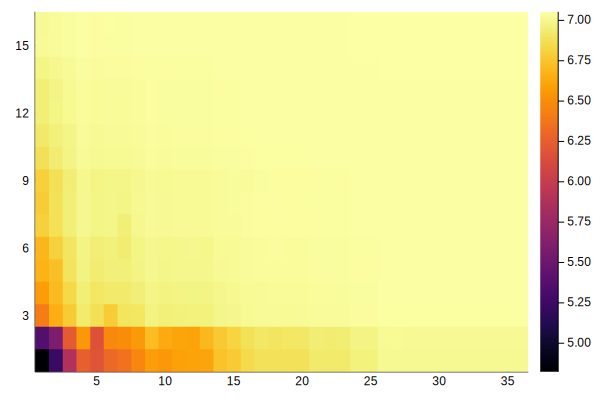

In [62]:
heatmap(reshape(StatsBase.var(posterior).^0.5, size(P)))

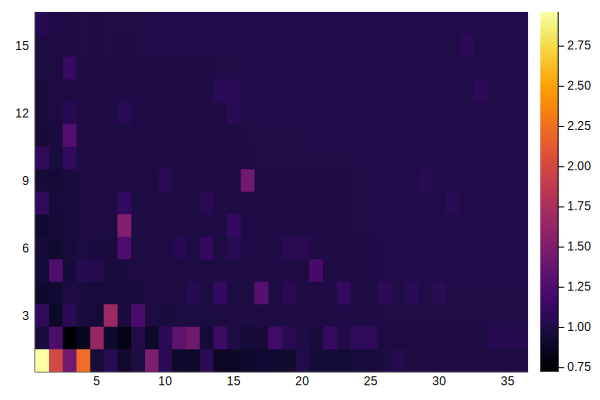

In [63]:
heatmap(reshape(StatsBase.mean(posterior), size(P)))

In [42]:
anim = @animate for i in 1:100
    Msample = reshape(rand(posterior), size(P))
    Msample .-= mean(Msample)
    heatmap(Msample, title="posterior distibution")
end

Animation("/var/folders/47/tqsl_skx6ml299bcyhpslmr80000gn/T/tmpFRaBF6", ["000001.png", "000002.png", "000003.png", "000004.png", "000005.png", "000006.png", "000007.png", "000008.png", "000009.png", "000010.png"  …  "000091.png", "000092.png", "000093.png", "000094.png", "000095.png", "000096.png", "000097.png", "000098.png", "000099.png", "000100.png"])

In [44]:
gif(anim, "post_mutnet.gif", fps = 15)

┌ Info: Saved animation to 
│   fn = /Users/michielstock/SVN_GITHUB/Ecology/OTSIN/post_mutnet.gif
└ @ Plots /Users/michielstock/.julia/packages/Plots/Ih71u/src/animation.jl:95


Plots.AnimatedGif("/Users/michielstock/SVN_GITHUB/Ecology/OTSIN/post_mutnet.gif")